In [16]:
## GOPALAM RAHUL MALIK - EEE20030

## importing tensorFlow, nNumPy, and matplotlib
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


## creates a sequential model
model=tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
## Feedforward network output gives as input

## loop iterates over the layers and retrieves the weights
for layer in model.layers:
    weights = layer.get_weights()
weights = np.array([[0.6519221]], dtype=np.float32)
## data we have to give, so we updating initial weights

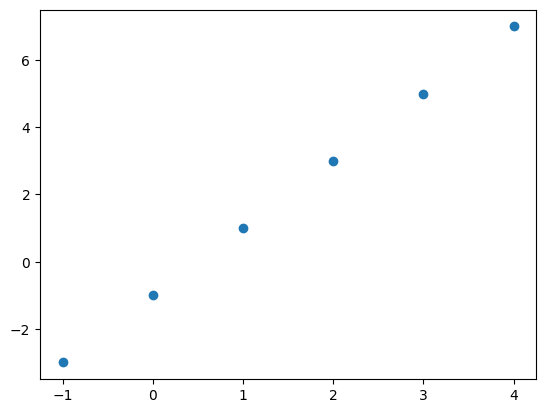

In [17]:
## line compiles the model
## optimizer -> stochastic gradient descent
## loss function -> mean squared error ('mse')
model.compile(optimizer='sgd', loss='mse')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=np.float32)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=np.float32)
##  line creates a scatter plot of the xs and ys
plt.scatter(xs, ys)

In [18]:
## trains the model using the xs and ys 
## 500 epochs to update the model's weights
model.fit(xs, ys, epochs=500)
## specified how many epochos we need to do back propogate 
## prediction using the trained model for the input
## one feet forward ,one updation of weights according to loss
## number of epochs need to be taken by taking consideration of complexity
print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 170ms/step - loss: 15.4640
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 12.4090
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 10.0006
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 8.1008
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 6.6014
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 5.4171
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 4.4807
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 3.7395
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 3.1520
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 2.6854
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 2.3141
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 2.0179
Epoch 13/500
1/1 [==============================] - 0s 3

In [19]:
## IMAGE PROCESSING
## Importing tensorFlow, keras, numPy, and matplotlib
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


## Loading the MNIST dataset
mnist = tf.keras.datasets.mnist
## data trasfered to training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
## Normalizing the pixel values of the images
(x_train, x_test) = (x_train / 255.0, x_test / 255.0)

10000


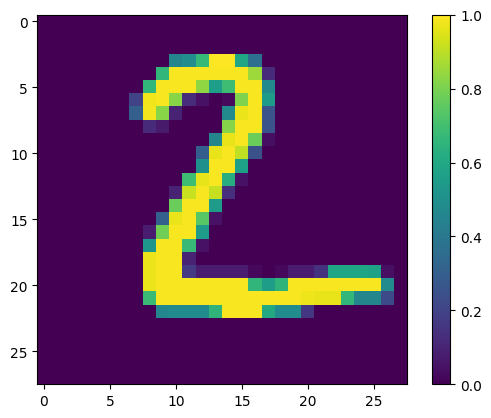

In [20]:
## Printing the length of the test set
print(len(x_test))
## normalizing the data directly for better purpose
plt.figure()
plt.imshow(x_test[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
## Creating a sequential model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])


## Obtaining predictions using the model
prediction1 = model(x_train[:1]).numpy()
print(prediction1)
predictions1 = model(x_test[:1]).numpy()
print(predictions1)

[[-0.70037115  0.10563191  0.55096585 -0.18320446 -0.55743307 -0.2228157
   0.01787504  0.04283735  0.54787236  0.129289  ]]
[[-0.6367181  -0.2050974   0.3004347  -0.0753711  -0.08604696 -0.05949233
  -0.21703759  0.26350042  0.13976002  0.34867764]]


In [22]:
## Applying the softmax function to the predictions
unmodel = tf.nn.softmax(predictions1).numpy()
print(unmodel[0])

[0.05209613 0.08021506 0.13298595 0.0913262  0.09035639 0.09278791
 0.07926299 0.12816381 0.11324672 0.13955885]


In [23]:
## Defining the loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss = loss_fn(y_train[:1], prediction1).numpy()

In [24]:
## specify the optimizer, loss function, and metrics
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2918 - accuracy: 0.9162
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1419 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1071 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0866 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0761 - accuracy: 0.9770
313/313 - 0s - loss: 0.0796 - accuracy: 0.9757 - 356ms/epoch - 1ms/step


[0.07955107092857361, 0.9757000207901001]

In [25]:
## creates a new sequential 
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
print(probability_model(x_test[:5]))

tf.Tensor(
[[5.02809030e-08 2.09943574e-09 4.37489518e-07 1.02788828e-04
  6.78846215e-12 1.05461119e-07 5.15717907e-14 9.99878645e-01
  1.39450322e-06 1.66267982e-05]
 [1.12954930e-10 4.38656076e-04 9.99356925e-01 2.02103707e-04
  2.42090255e-17 2.19061803e-06 5.54822899e-09 1.32515188e-13
  1.07898515e-07 1.17249274e-14]
 [4.94152346e-07 9.98741925e-01 7.86413439e-05 2.74674185e-05
  1.28620057e-04 3.53193309e-06 5.63193680e-06 6.33347081e-04
  3.66450928e-04 1.39609965e-05]
 [9.99916911e-01 2.52190513e-09 1.08815893e-05 1.18768764e-06
  8.13111427e-08 5.69205895e-07 5.42901080e-06 7.29090198e-06
  1.70075111e-07 5.73724974e-05]
 [1.12494199e-05 2.54876422e-08 1.58651783e-05 2.97987572e-08
  9.94280100e-01 3.10348241e-07 1.34706770e-05 3.54994409e-05
  4.98049667e-06 5.63831395e-03]], shape=(5, 10), dtype=float32)
